# Actual

In [1]:
import pickle
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime

In [2]:
list_num_user = [
                100, 
                 500, 
                 1000
                 ]

In [3]:
from matplotlib.gridspec import GridSpec
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300


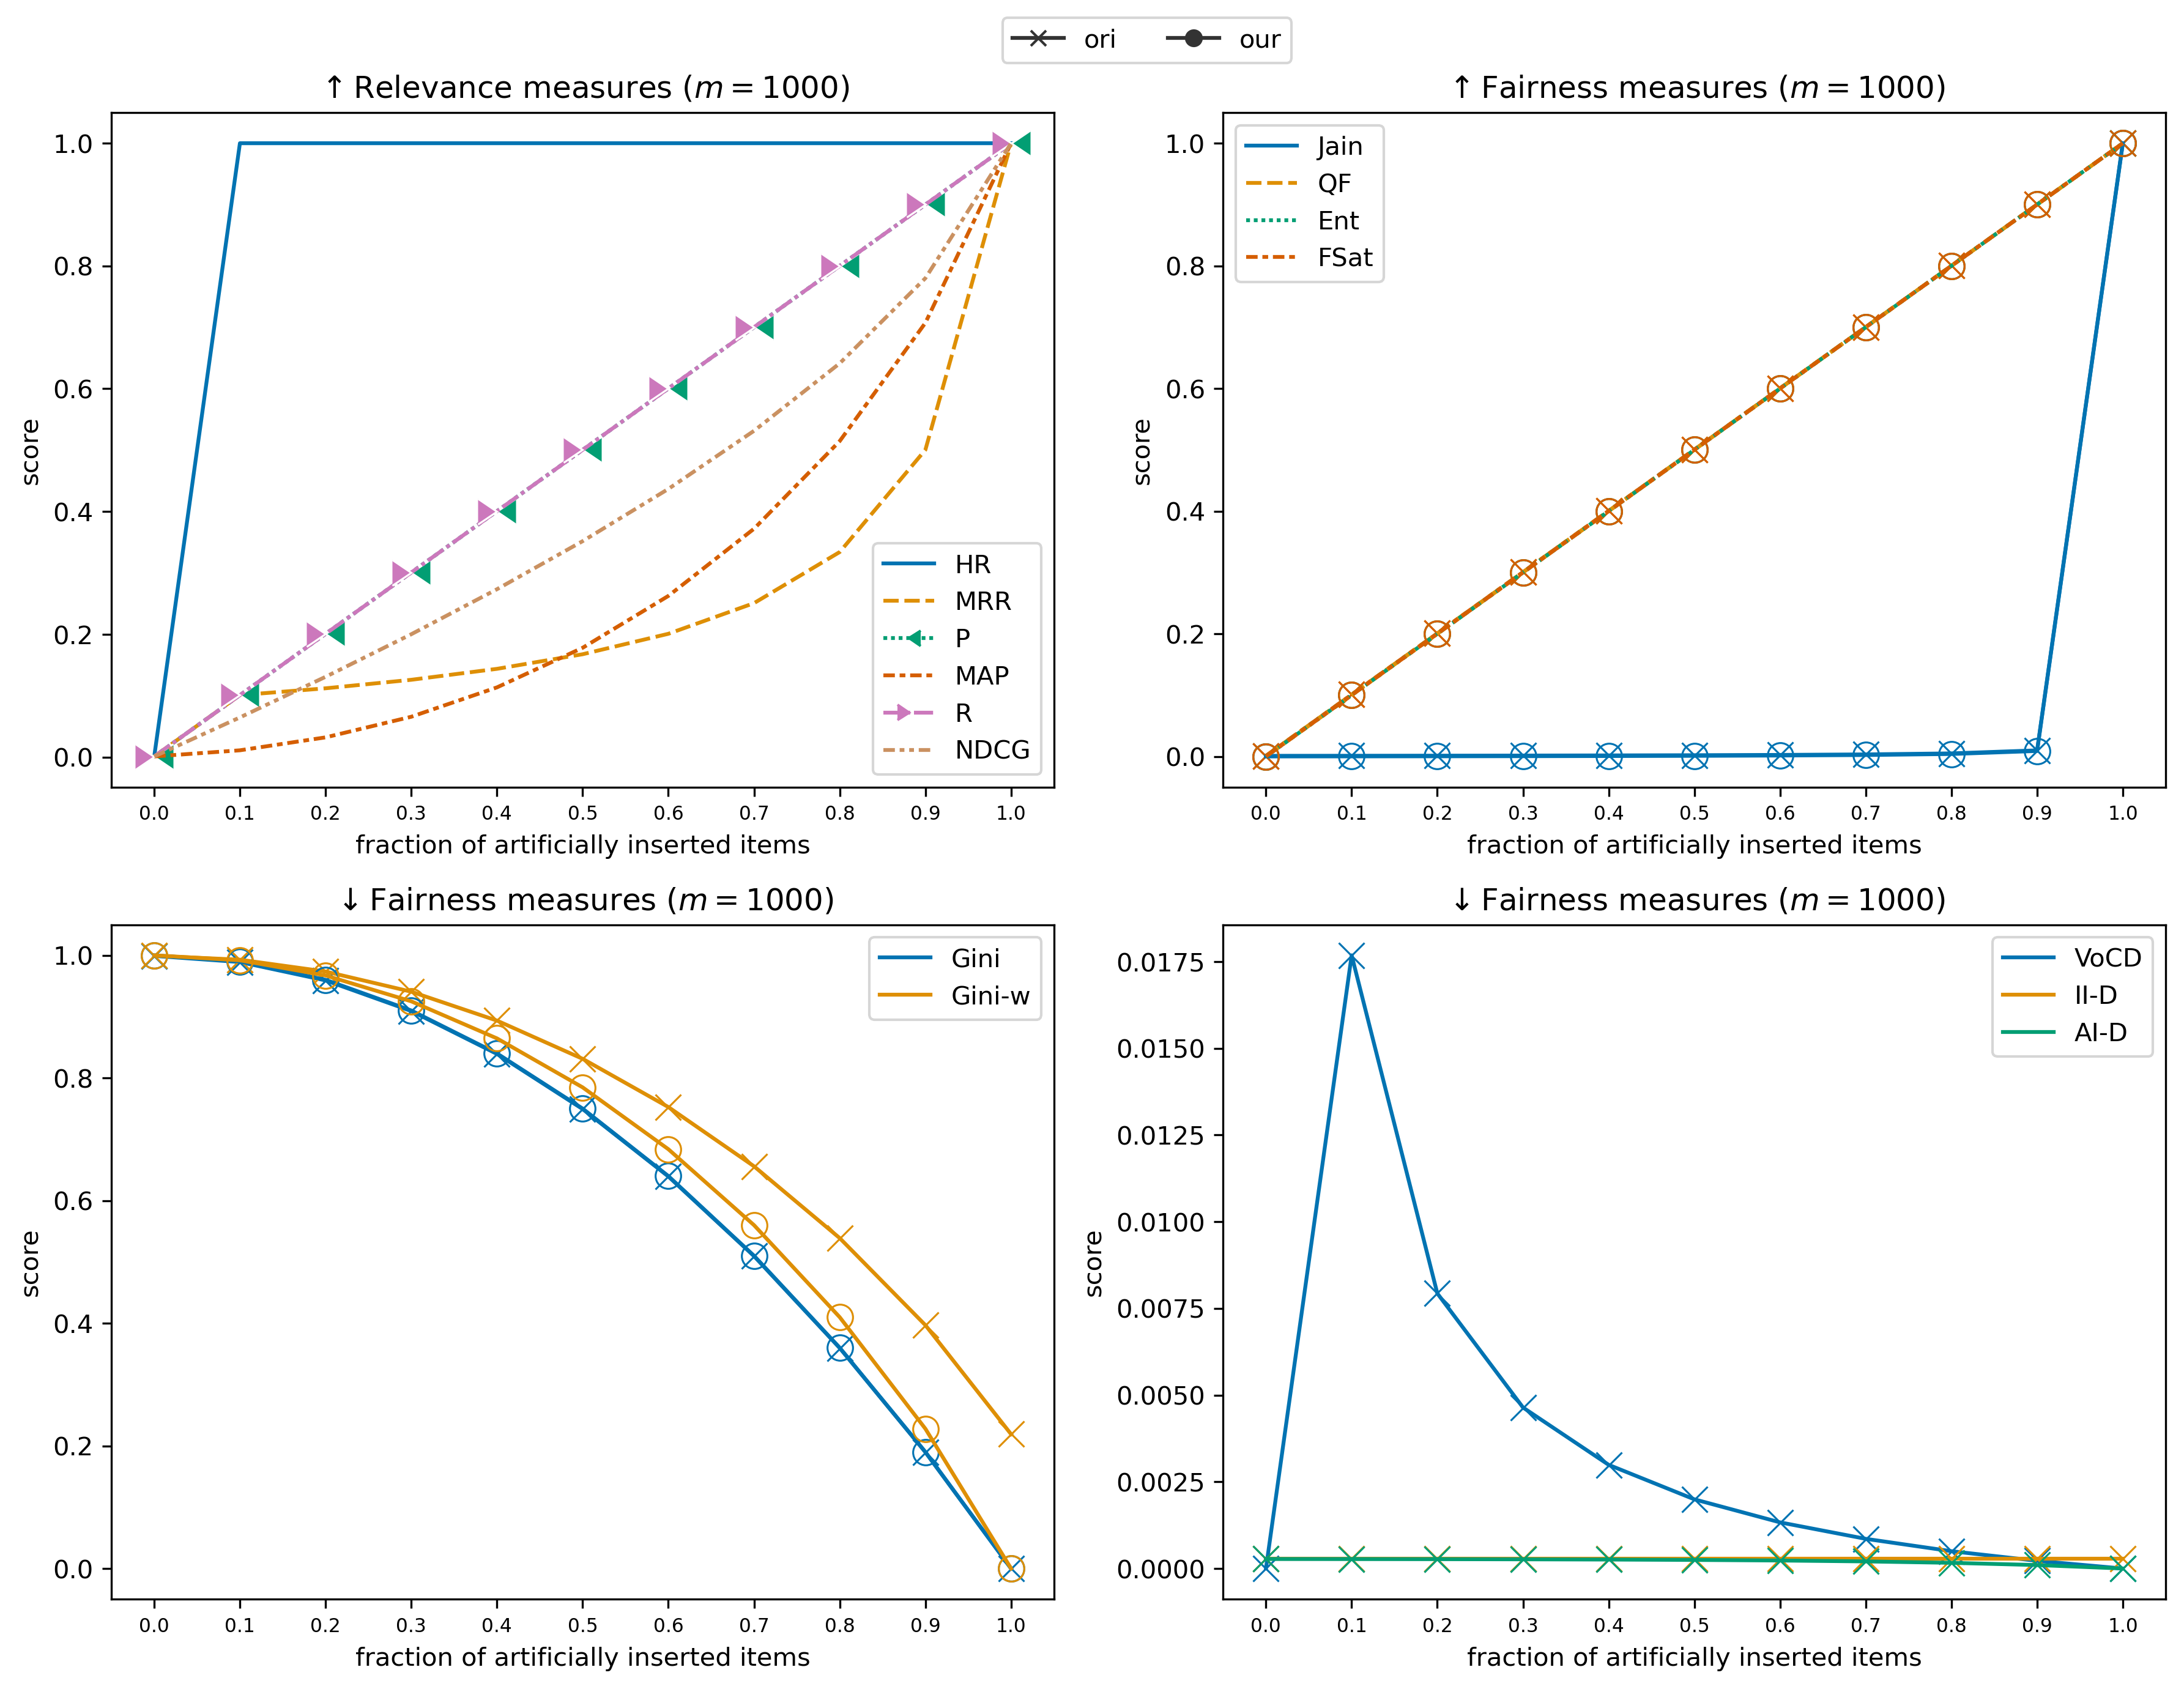

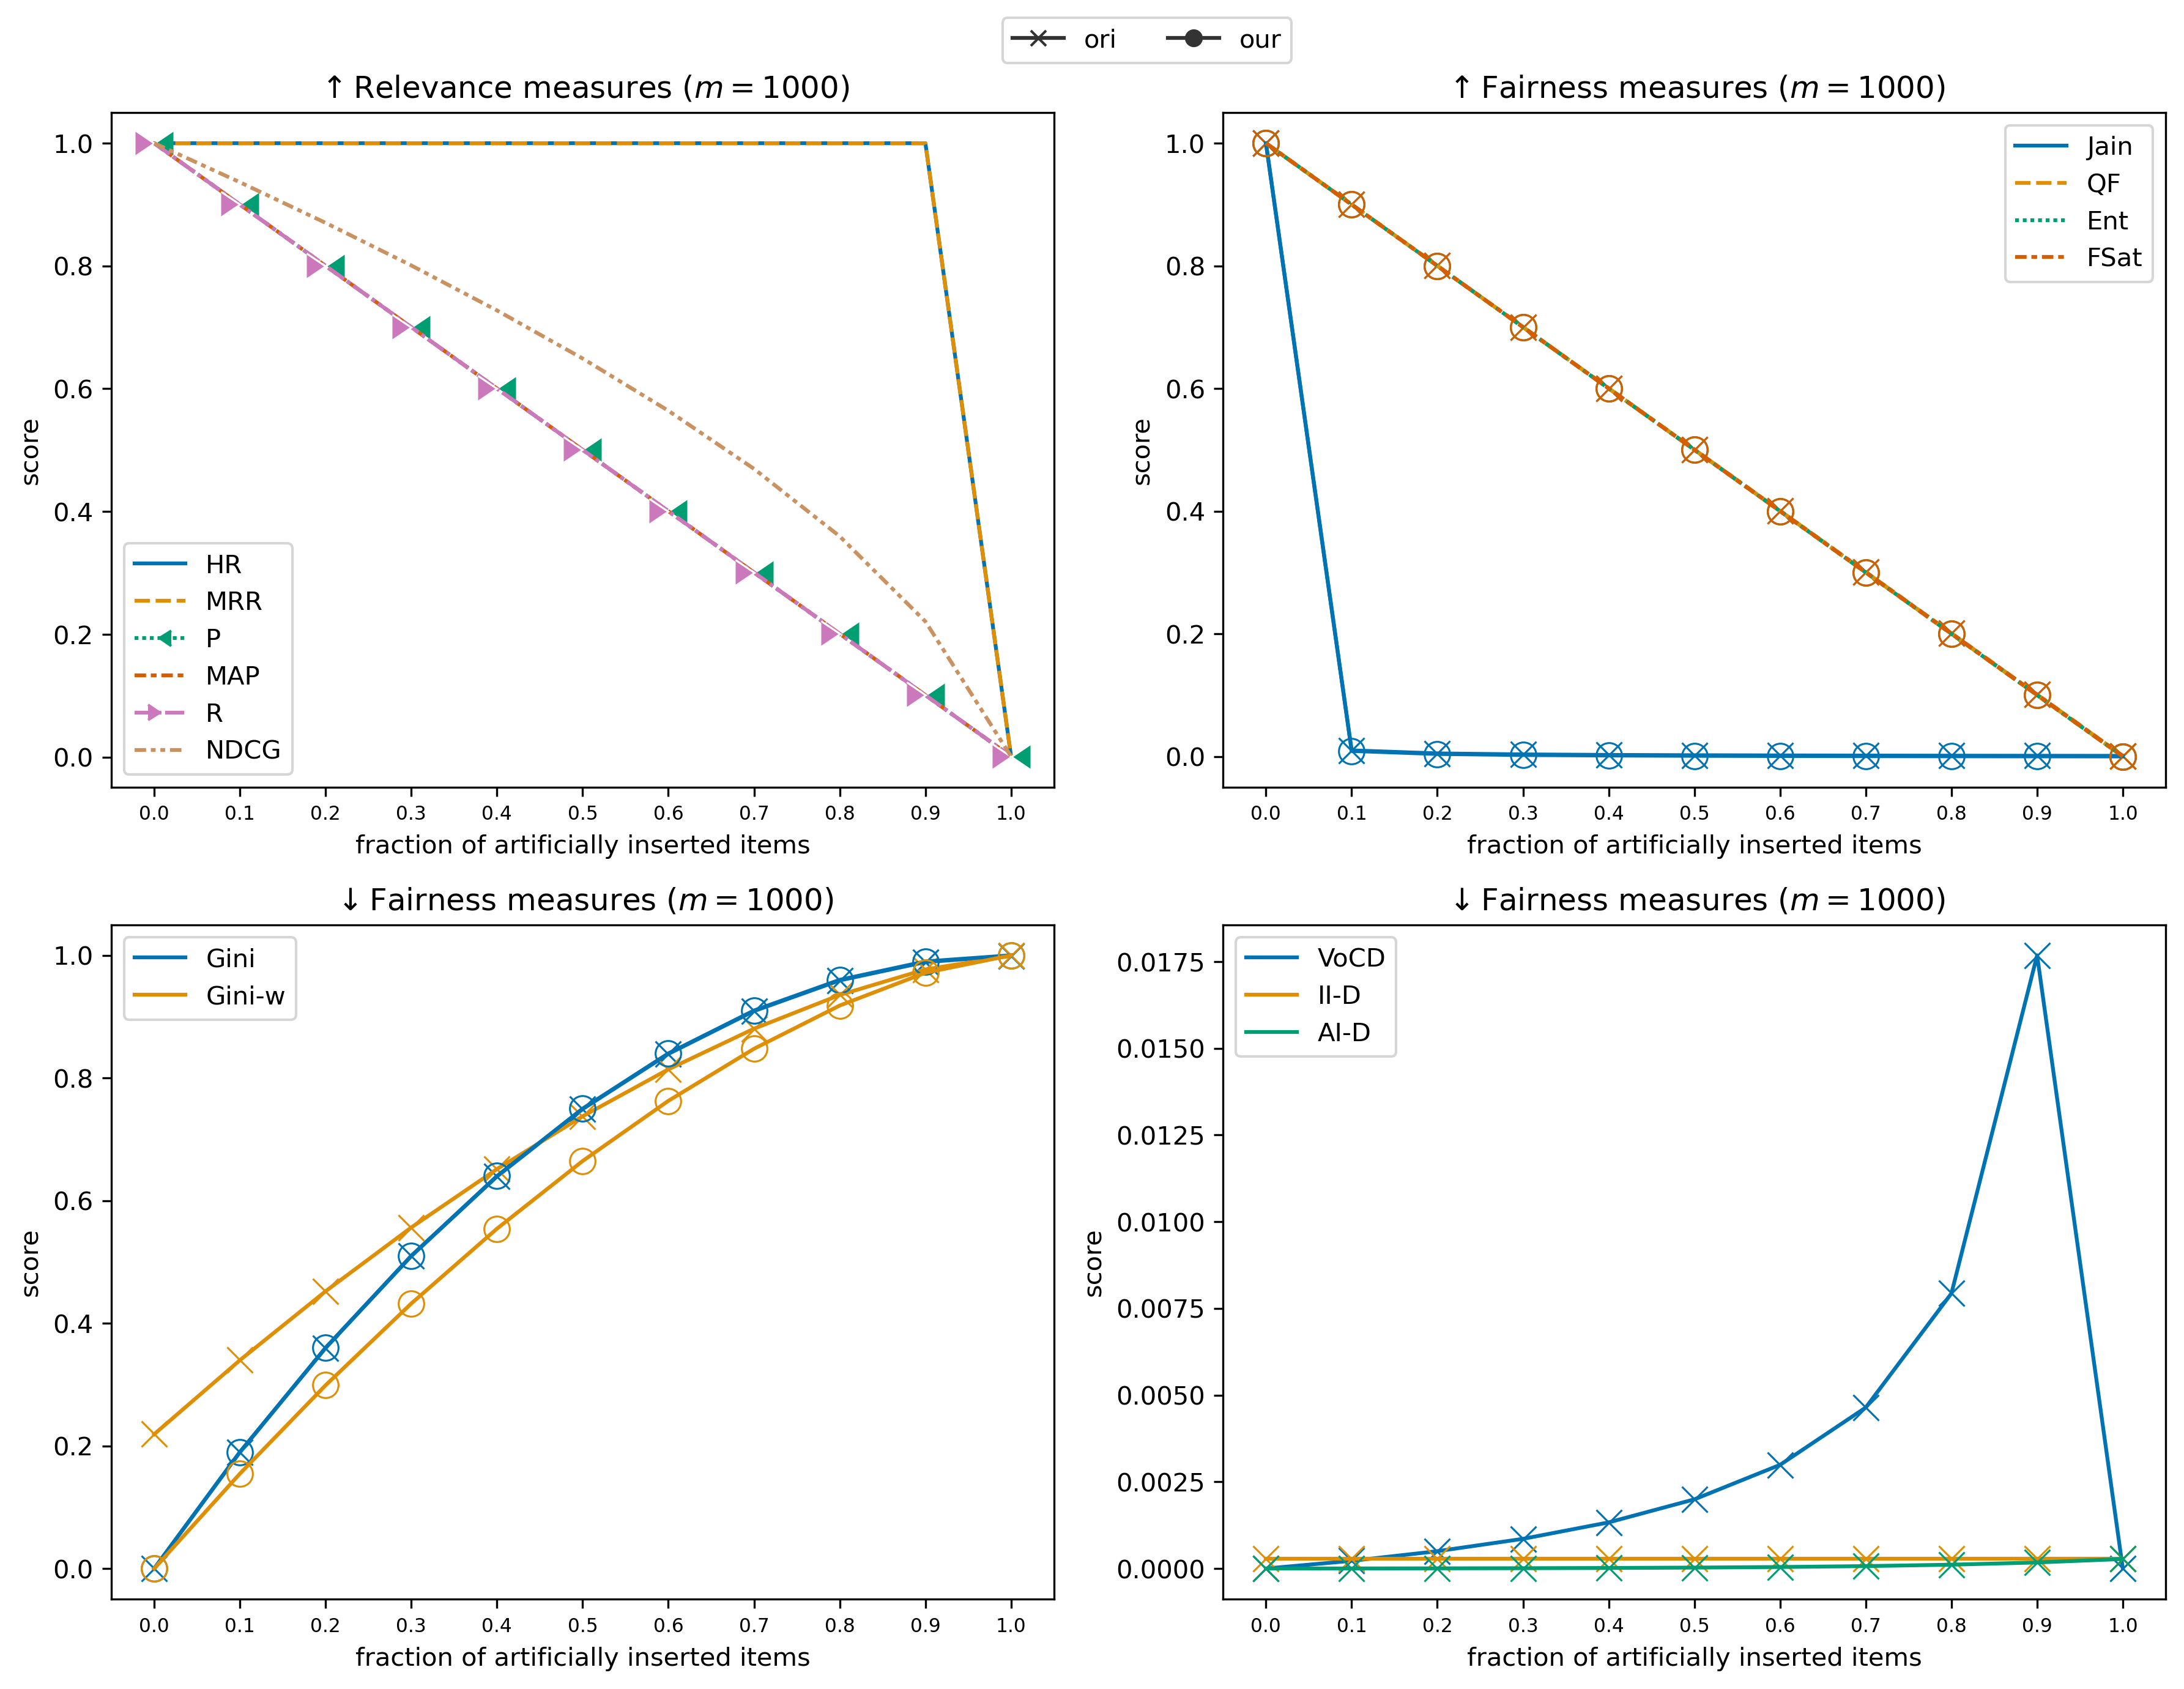

In [4]:
for exp_type in ["fair","unfair"]:

    fig, ax = plt.subplots(2,2, figsize=(12,9))

    ax1 = ax[0,0]
    ax2 = ax[0,1]
    ax3 = ax[1,0]
    ax4 = ax[1,1]

    for i, num_user in enumerate(list_num_user):

        with open(f"artificial_insertion/{exp_type}_user_{str(num_user).zfill(4)}_exact_km.pickle", "rb") as f:
            result = pickle.load(f)

        df = pd.DataFrame(result)
        df.columns = df.columns.astype(int) /10
        df.index = df.index.str.strip("@10")
        df = df.unstack().reset_index()
        df.columns = ["position","measure","score"]
        df = df.set_index("measure")

        selected_index = df.index.unique()

        rel_measures = selected_index[~selected_index.str.contains("_")]
        fair_measures = selected_index[selected_index.str.contains("_")]
        only_fair_measures =fair_measures

        only_fair_measures_higher_better  = only_fair_measures[only_fair_measures.str.contains("Jain|QF|Ent|FSat")]
        only_fair_measures_higher_worse  = only_fair_measures[only_fair_measures.str.contains("Gini")]
        VocD_D = only_fair_measures[only_fair_measures.str.contains("VoCD|II-D|AI-D")]

        thisdata = df

        rel_result = thisdata.loc[rel_measures].reset_index()
        only_fair_result_higher = thisdata.loc[only_fair_measures_higher_better].reset_index()
        only_fair_result_lower = thisdata.loc[only_fair_measures_higher_worse].reset_index()
        VocD_D_result = thisdata.loc[VocD_D].reset_index()

        splitted_fair_higher = only_fair_result_higher.measure.str.rsplit("_",1)
        only_fair_result_higher["version"] = [x[1] for x in splitted_fair_higher]

        splitted_fair_lower = only_fair_result_lower.reset_index().measure.str.rsplit("_",1)
        only_fair_result_lower["version"] = [x[1] for x in splitted_fair_lower]

        splitted_VocD_D = VocD_D_result.measure.str.rsplit("_",1)
        VocD_D_result["version"] = [x[1] for x in splitted_VocD_D]

        only_fair_result_higher["measure"] = only_fair_result_higher["measure"].str.replace("_.*","")
        only_fair_result_lower["measure"] = only_fair_result_lower["measure"].str.replace("_.*","")
        VocD_D_result["measure"] = VocD_D_result["measure"].str.replace("_.*","")

        plotting_dict = {"x":"position", "y":"score", "hue":"measure", "palette":"colorblind","markersize":10}

        if num_user == 1000:

            sns.lineplot(data=rel_result, ax=ax1, style="measure", markers=["","",4,"", 5,""], **plotting_dict)

            for version, marker in zip(['ori','our'],["x","o"]):
                sns.lineplot(data=only_fair_result_higher[only_fair_result_higher.version==version], ax=ax2, style="measure", markers=marker, dashes=True, mec=None,
                            mfc="none", **plotting_dict)
                sns.lineplot(data=only_fair_result_lower[only_fair_result_lower.version==version], ax=ax3,  markers=marker, style="version", dashes=False, mec=None,
                            mfc="none", **plotting_dict)
                sns.lineplot(data=VocD_D_result[VocD_D_result.version==version], ax=ax4,  markers=marker,  style="version", dashes=False,mec=None,
                            mfc="none", **plotting_dict)


    ax1.set_title(f"$\\uparrow$Relevance measures ($m=${num_user})")
    ax2.set_title(f"$\\uparrow$Fairness measures ($m=${num_user})")
    ax3.set_title(f"$\\downarrow$Fairness measures ($m=${num_user})")
    ax4.set_title(f"$\\downarrow$Fairness measures ($m=${num_user})")


    for this_ax in [ax1, ax2, ax3, ax4]:

        this_ax.set_xlabel("fraction of artificially inserted items")
        this_ax.set(xticks=np.linspace(0, 1, num=11))
        this_ax.tick_params(axis='x', which='major', labelsize=7.5, rotation=0)

    handles, ori_labels = ax3.get_legend_handles_labels()
    ori_our = [(handle, ori_label) for handle, ori_label in zip(handles, ori_labels) if ori_label in ["ori","our"]]
    new_handle = [x[0] for x in ori_our]
    new_labels = [x[1] for x in ori_our]

    fig.legend(new_handle, new_labels, 
            loc='upper center', 
            bbox_to_anchor=(0.525, 1.025), ncol=len(new_labels)
            )

    handles, ori_labels = ax1.get_legend_handles_labels()
    ax1.legend(handles[0:], ori_labels[0:])   

    #fake plot to get legend for Jain, QF, etc
    for_legend = plt.figure()
    sns.lineplot(data=only_fair_result_higher[only_fair_result_higher.version==version], style="measure", dashes=True,mec=None, mfc="none",**plotting_dict)


    ax2_handle, ax2_label = plt.gca().get_legend_handles_labels()
    ax2.legend(ax2_handle, ax2_label)    

    handles, ori_labels = ax3.get_legend_handles_labels()
    ax3.legend(handles[1:3], ori_labels[1:3])   

    handles, ori_labels = ax4.get_legend_handles_labels()
    ax4.legend(handles[1:4], ori_labels[1:4])   
    plt.close(for_legend)

    fig.tight_layout()    
    fig.show()
    fig.savefig(f"artificial_insertion/insert_{exp_type}.pdf",bbox_inches="tight")   


## 100, 500

In [5]:
%%capture
ori_our = pd.DataFrame(np.ones((2,3)),columns=["x","y","version"])
ori_our["version"] = ["ori","our"]
for_legend, ax_legend = plt.subplots(1,1)
additional_plotting_dict = {"mec":None,"mfc":"none"}
_ = sns.lineplot(x="x",y="y", data=ori_our.query("version=='ori'"), style='version', markers=["x"], dashes=False, **additional_plotting_dict)
_ = sns.lineplot(x="x",y="y", data=ori_our.query("version=='our'"), style='version', markers=["o"], dashes=False, **additional_plotting_dict)

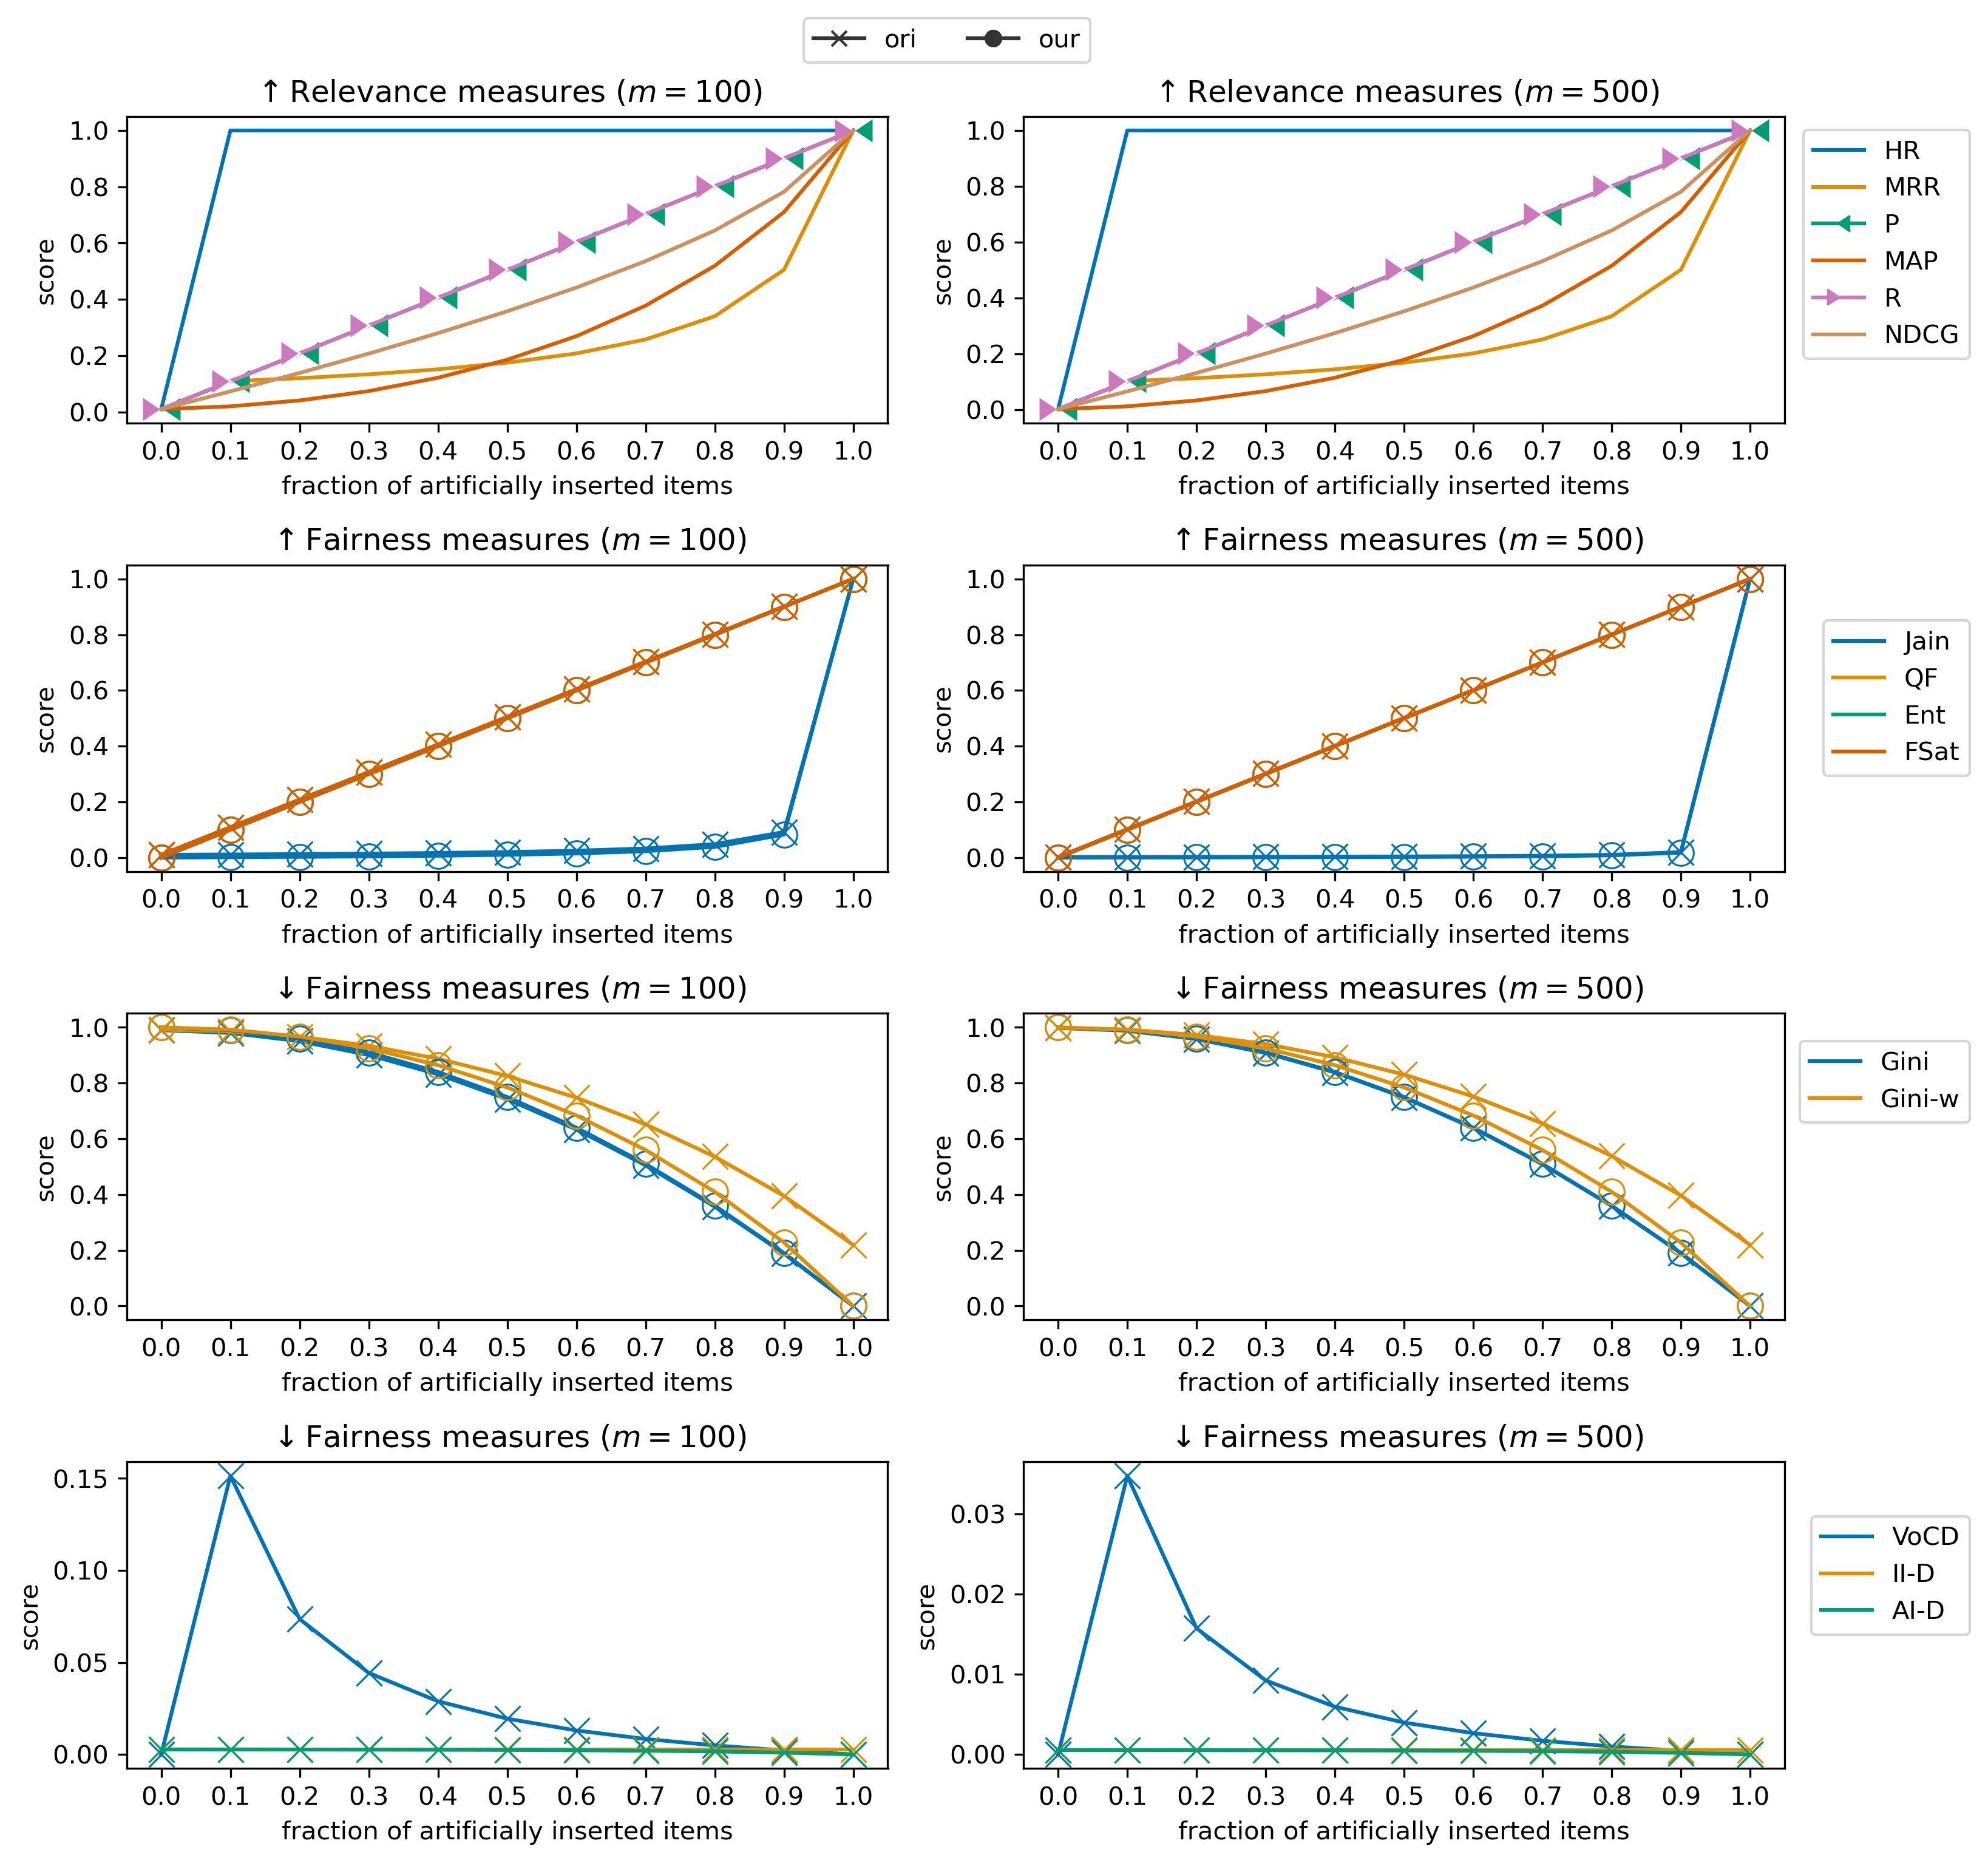

In [6]:

def plot_df(df,i, ax, num_user):
    df = df.unstack().reset_index()
    df.columns = ["position","measure","score"]
    df = df.set_index("measure")

    selected_index = df.index.unique()

    rel_measures = selected_index[~selected_index.str.contains("_")]
    fair_measures = selected_index[selected_index.str.contains("_")]
    only_fair_measures =fair_measures

    only_fair_measures_higher_better  = only_fair_measures[only_fair_measures.str.contains("Jain|QF|Ent|FSat")]
    only_fair_measures_higher_worse  = only_fair_measures[only_fair_measures.str.contains("Gini")]
    VocD_D = only_fair_measures[only_fair_measures.str.contains("VoCD|II-D|AI-D")]

    thisdata = df

    rel_result = thisdata.loc[rel_measures].reset_index()
    only_fair_result_higher = thisdata.loc[only_fair_measures_higher_better].reset_index()
    only_fair_result_lower = thisdata.loc[only_fair_measures_higher_worse].reset_index()
    VocD_D_result = thisdata.loc[VocD_D].reset_index()

    splitted_fair_higher = only_fair_result_higher.measure.str.rsplit("_",1)
    only_fair_result_higher["version"] = [x[1] for x in splitted_fair_higher]

    splitted_fair_lower = only_fair_result_lower.reset_index().measure.str.rsplit("_",1)
    only_fair_result_lower["version"] = [x[1] for x in splitted_fair_lower]

    splitted_VocD_D = VocD_D_result.measure.str.rsplit("_",1)
    VocD_D_result["version"] = [x[1] for x in splitted_VocD_D]

    only_fair_result_higher["measure"] = only_fair_result_higher["measure"].str.replace("_.*","")
    only_fair_result_lower["measure"] = only_fair_result_lower["measure"].str.replace("_.*","")
    VocD_D_result["measure"] = VocD_D_result["measure"].str.replace("_.*","")



    plotting_dict = {"x":"position", "y":"score", "hue":"measure", 
                     "dashes": False,"palette":"colorblind","markersize":10}
    sns.lineplot(data=rel_result, ax=ax[0,i], style="measure", markers=["","",4,"", 5,""],**plotting_dict)

    for ver, marker in zip(["ori", "our"],["x","o"]):

        sns.lineplot(data=only_fair_result_higher.query("version==@ver"), ax=ax[1,i], style="version", markers=marker, **plotting_dict, **additional_plotting_dict)
        sns.lineplot(data=only_fair_result_lower.query("version==@ver"), ax=ax[2,i], style="version",  markers=marker, **plotting_dict,**additional_plotting_dict)
        sns.lineplot(data=VocD_D_result.query("version==@ver"), ax=ax[3,i], style="version",  markers=marker, **plotting_dict, **additional_plotting_dict)
    
    ax[0,i].set_title(f"$\\uparrow$Relevance measures ($m=${num_user})")
    ax[1,i].set_title(f"$\\uparrow$Fairness measures ($m=${num_user})")
    ax[2,i].set_title(f"$\\downarrow$Fairness measures ($m=${num_user})")
    ax[3,i].set_title(f"$\\downarrow$Fairness measures ($m=${num_user})")
  
    for j in range(4):
        ax[j,i].set_xlabel("fraction of artificially inserted items")
        ax[j,i].set(xticks=np.linspace(0, 1, num=11))
        ax[j,i].tick_params(axis='x', which='major')

def handle_legend(fig, ax):

                
    # https://stackoverflow.com/questions/9834452/how-do-i-make-a-single-legend-for-many-subplots

    for row, stop in enumerate(["",5,3,4]):
        handles, ori_labels = ax[row,1].get_legend_handles_labels()

        axbox = ax[row,1].get_position()
        loc_dict = {
                    0:[axbox.x1+0.55*axbox.width, axbox.y1+0.5*axbox.height],
                    1:[axbox.x1+0.55*axbox.width, axbox.y1+0.015],
                    2:[axbox.x1+0.55*axbox.width, axbox.y1-0.015],
                    3:[axbox.x1+0.55*axbox.width, axbox.y1-0.075],
        }

        if row == 0:
            fig.legend(handles, ori_labels, 
                bbox_to_anchor=loc_dict[row]
                )
        else:        
            fig.legend(handles[1:stop], ori_labels[1:stop], 
                bbox_to_anchor=loc_dict[row]
                )
     # #takeout legend
    handles, ori_labels = ax_legend.get_legend_handles_labels()

    fig.legend(handles[-2:], ori_labels[-2:], 
            loc='upper center', bbox_to_anchor=(0.525, 1.025), ncol=2)
    [[c.get_legend().remove() for c in r] for r in ax]
    
def plot(exp_type:str, list_num_user:list):
    fig, ax= plt.subplots(4, 2, figsize=(10,10))

    now = datetime.now()
    time = str(now.strftime("%Y-%m-%d"))
    for i, num_user in enumerate(list_num_user):

        with open(f"artificial_insertion/{exp_type}_user_{str(num_user).zfill(4)}_exact_km.pickle", "rb") as f:
            result = pickle.load(f)

        df = pd.DataFrame(result)
        df.columns = df.columns.astype(int) /10
        df.index = df.index.str.strip("@10")
        plot_df(df, i, ax, num_user)

    handle_legend(fig, ax)
    plt.tight_layout()    
    plt.savefig(f'artificial_insertion/{exp_type}_100_500.pdf',bbox_inches="tight")
markers = ["o","X"]
plot("fair",[100,500])

# Check small values of II-D/AI-D

In [9]:
with open(f"artificial_insertion/fair_user_0100_exact_km.pickle", "rb") as f:
    result = pickle.load(f)

df = pd.DataFrame(result)
df.columns = df.columns.astype(int) /10
df.index = df.index.str.strip("@10")

In [10]:
df

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
HR,0.010000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
MRR,0.010000,0.109000,0.120000,0.133750,0.151429,0.175000,0.208000,0.257500,0.340000,0.505000,1.000000
P,0.010000,0.109000,0.208000,0.307000,0.406000,0.505000,0.604000,0.703000,0.802000,0.901000,1.000000
MAP,0.010000,0.019900,0.040800,0.074075,0.121493,0.185411,0.269129,0.377596,0.519064,0.710032,1.000000
R,0.010000,0.109000,0.208000,0.307000,0.406000,0.505000,0.604000,0.703000,0.802000,0.901000,1.000000
NDCG,0.010000,0.072985,0.138576,0.207313,0.279943,0.357558,0.441849,0.535690,0.644635,0.782109,1.000000
Jain_ori,0.010000,0.011099,0.012469,0.014225,0.016556,0.019802,0.024631,0.032573,0.048077,0.091743,1.000000
Jain_our,0.000000,0.001110,0.002494,0.004267,0.006623,0.009901,0.014778,0.022801,0.038462,0.082569,1.000000
QF_ori,0.010000,0.109000,0.208000,0.307000,0.406000,0.505000,0.604000,0.703000,0.802000,0.901000,1.000000
QF_our,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000


In [14]:
with open(f"artificial_insertion/fair_user_0500_exact_km.pickle", "rb") as f:
    result = pickle.load(f)

df = pd.DataFrame(result)
df.columns = df.columns.astype(int) /10
df.index = df.index.str.strip("@10")
df

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
HR,0.002000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
MRR,0.002000,0.101800,0.112889,0.126750,0.144571,0.168333,0.201600,0.251500,0.334667,0.501000,1.000000e+00
P,0.002000,0.101800,0.201600,0.301400,0.401200,0.501000,0.600800,0.700600,0.800400,0.900200,1.000000e+00
MAP,0.002000,0.011980,0.033049,0.066593,0.114394,0.178828,0.263223,0.372567,0.515178,0.707689,1.000000e+00
R,0.002000,0.101800,0.201600,0.301400,0.401200,0.501000,0.600800,0.700600,0.800400,0.900200,1.000000e+00
NDCG,0.002000,0.065494,0.131615,0.200908,0.274125,0.352366,0.437339,0.531938,0.641764,0.780348,1.000000e+00
Jain_ori,0.002000,0.002222,0.002499,0.002855,0.003329,0.003992,0.004985,0.006636,0.009921,0.019646,1.000000e+00
Jain_our,0.000000,0.000222,0.000500,0.000856,0.001332,0.001996,0.002991,0.004645,0.007937,0.017682,1.000000e+00
QF_ori,0.002000,0.101800,0.201600,0.301400,0.401200,0.501000,0.600800,0.700600,0.800400,0.900200,1.000000e+00
QF_our,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000e+00


In [12]:
with open(f"artificial_insertion/fair_user_1000_exact_km.pickle", "rb") as f:
    result = pickle.load(f)

df = pd.DataFrame(result)
df.columns = df.columns.astype(int) /10
df.index = df.index.str.strip("@10")
df

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
HR,0.001000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
MRR,0.001000,0.100900,0.112000,0.125875,0.143714,0.167500,0.200800,0.250750,0.334000,0.500500,1.000000e+00
P,0.001000,0.100900,0.200800,0.300700,0.400600,0.500500,0.600400,0.700300,0.800200,0.900100,1.000000e+00
MAP,0.001000,0.010990,0.032080,0.065657,0.113506,0.178005,0.262484,0.371938,0.514692,0.707396,1.000000e+00
R,0.001000,0.100900,0.200800,0.300700,0.400600,0.500500,0.600400,0.700300,0.800200,0.900100,1.000000e+00
NDCG,0.001000,0.064557,0.130745,0.200107,0.273397,0.351717,0.436775,0.531469,0.641405,0.780128,1.000000e+00
Jain_ori,0.001000,0.001111,0.001250,0.001428,0.001666,0.001998,0.002496,0.003326,0.004980,0.009911,1.000000e+00
Jain_our,0.000000,0.000111,0.000250,0.000428,0.000666,0.000999,0.001498,0.002328,0.003984,0.008920,1.000000e+00
QF_ori,0.001000,0.100900,0.200800,0.300700,0.400600,0.500500,0.600400,0.700300,0.800200,0.900100,1.000000e+00
QF_our,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000e+00
